# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

# Data load

In [8]:
import os
#os.chdir('C:/Users/postgres/Desktop/심리 성향 예측/open data') #desktop
os.chdir('C:/Users/user/Desktop/심리 성향 예측/open data') #notebook

In [9]:
pwd

'C:\\Users\\user\\Desktop\\심리 성향 예측\\open data'

In [39]:
train=pd.read_csv('train.csv', index_col=0)
test=pd.read_csv('test_x.csv', index_col=0)
submission=pd.read_csv('sample_submission.csv', index_col=0)  
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 77)
(11383, 76)
(11383, 1)


In [11]:
train['race'].value_counts()

White                    31248
Asian                     6834
Other                     4330
Black                     2168
Native American            548
Arab                       351
Indigenous Australian       53
Name: race, dtype: int64

In [12]:
le = LabelEncoder()
train['race'] = le.fit_transform(train['race']) #하나의 열에 서로 다른 숫자 입력

In [13]:
#oh = OneHotEncoder()   #다수의 열에 0,1 입력
#race = oh.fit_transform(train['race'].values.reshape(-1,1)).toarray()
#race

In [14]:
#race.shape

In [15]:
#x = np.array([1,1,1,1,1,1,1,1,1])

In [16]:
#x.reshape(3,3)
# 행에 -1 이면 '열(column)' 차원의 '정수'에 따라서 모든 원소가 빠짐없이 배치될 수 있도록 
#'-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐

In [17]:
#x.reshape(-1,1)

In [18]:
### 요기 위에 OneHotEncoder부터가 더미 만드는거// reshape 좀 더 찾아보기 (완료)

In [19]:
pd.set_option('display.max_columns', 100) # 더 많은 행렬 볼 때, pd.set_option 사용
pd.set_option('display.max_rows', 100)
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,6,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,1,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,6,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,1,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,6,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6,Female,1,3,6,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,2.0,549,5.0,390,4.0,1601,5.0,1312,1.0,1699,4.0,1229,4.0,1175,1.0,1078,4.0,341,5.0,635,2.0,1448,4.0,838,4.0,765,3.0,1954,1.0,1482,20s,2,1,3,Male,1,1,6,Atheist,2,4,3,5,1,1,3,2,1,5,2,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,1.0,483,1.0,592,1.0,2020,5.0,6022,5.0,2090,4.0,1767,5.0,982,5.0,1576,1.0,782,3.0,911,5.0,417,1.0,392,5.0,1510,1.0,842,1.0,1138,30s,2,1,1,Male,1,1,6,Christian_Other,3,6,0,0,0,0,0,1,2,6,2,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,2.0,1322,5.0,1014,5.0,3014,3.0,3771,3.0,13295,5.0,3605,3.0,9265,4.0,2531,1.0,812,4.0,2595,5.0,1227,5.0,1837,4.0,1218,4.0,9923,5.0,1631,20s,4,2,0,Female,2,1,5,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [20]:
train.columns ###까지가 기본 베이스라인

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [21]:
a= ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

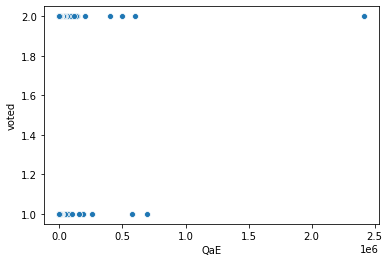

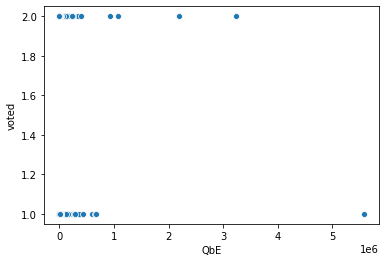

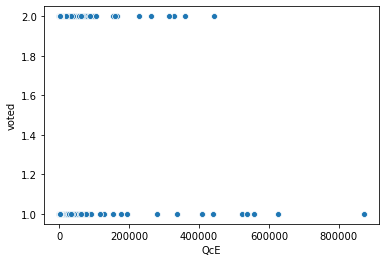

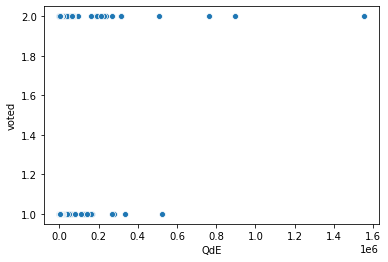

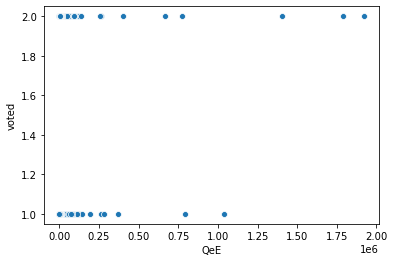

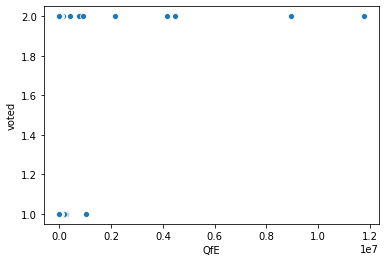

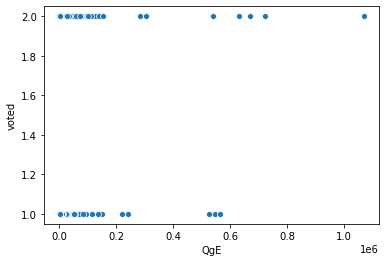

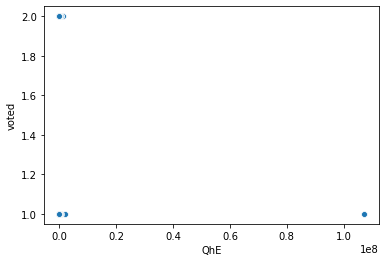

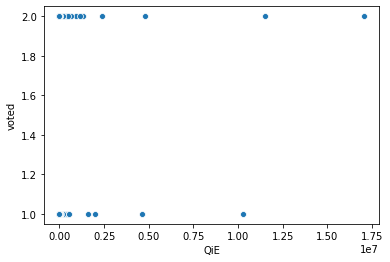

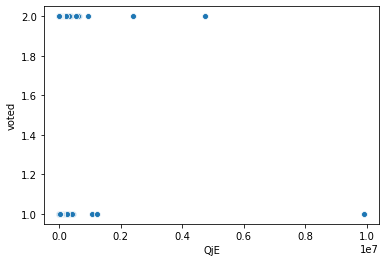

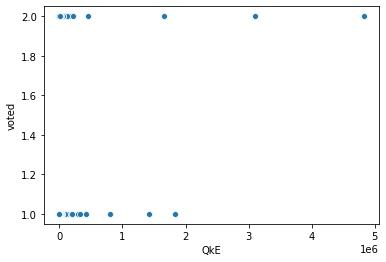

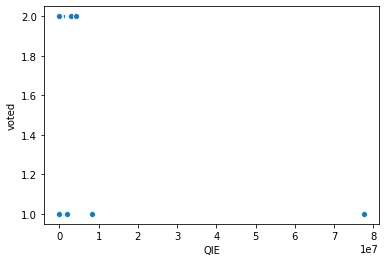

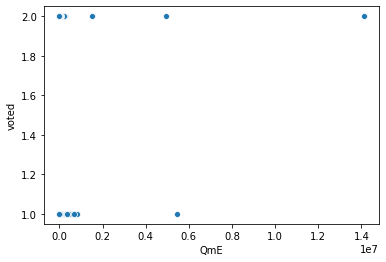

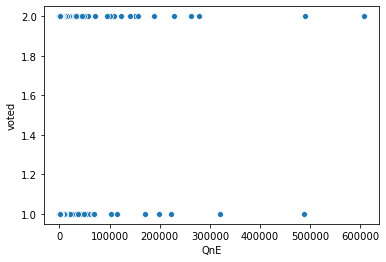

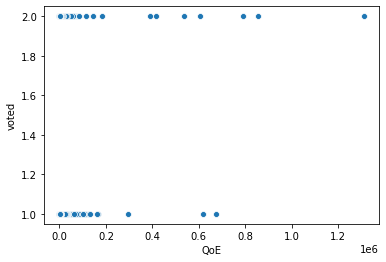

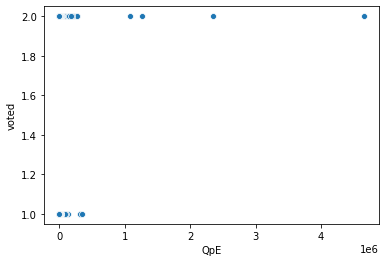

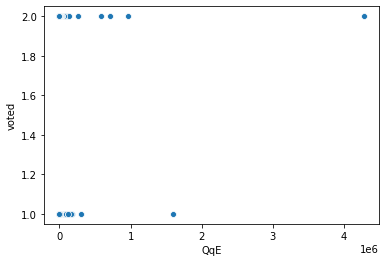

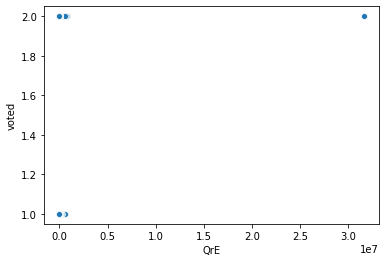

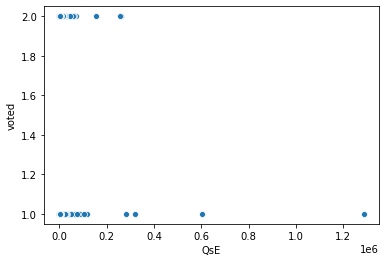

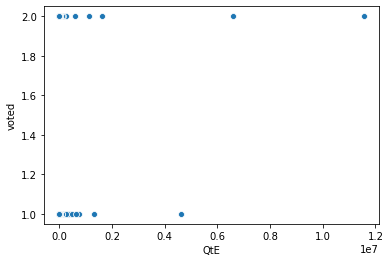

In [23]:
col_list = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE']
col_int = []
for col in col_list:
    if train[col].dtype == 'int64':
        sns.scatterplot(x = train[col], y = 'voted',data = train)
    else:
        continue
    plt.show()
    
    ### 데이터가 정수인 것만 col_int에 할당하고 나머지는 플롯그려봐 -> 답변시간과 투표 결과의 상관성 파악

In [24]:
col_int = []
col_float = []
for col in col_list:
    if train[col].dtype == 'int64':
        col_int.append(col)
    else:
        col_float.append(col)
### 정수형과 실수형 구분 (이게 위에 것보다 좋음)

In [25]:
col_int

['QaE',
 'QbE',
 'QcE',
 'QdE',
 'QeE',
 'QfE',
 'QgE',
 'QhE',
 'QiE',
 'QjE',
 'QkE',
 'QlE',
 'QmE',
 'QnE',
 'QoE',
 'QpE',
 'QqE',
 'QrE',
 'QsE',
 'QtE']

In [26]:


import statsmodels.api as sm

### 로지스틱 회귀 돌리는 패키지

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [28]:
le = LabelEncoder()

###다른 이름으로 인코딩  --> 기준은 0 (여기선 1,2 ->0,1)

In [29]:
train['voted'] = le.fit_transform(train['voted'])

In [30]:
train['voted'].value_counts()

1    24898
0    20634
Name: voted, dtype: int64

In [31]:
logit = sm.Logit(endog = train['voted'] , exog = train[col_int]).fit()  #endog=y, exog=x

logit.summary()

Optimization terminated successfully.
         Current function value: 0.691845
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  voted   No. Observations:                45532
Model:                          Logit   Df Residuals:                    45512
Method:                           MLE   Df Model:                           19
Date:                Mon, 19 Oct 2020   Pseudo R-squ.:               -0.004486
Time:                        01:46:45   Log-Likelihood:                -31501.
converged:                       True   LL-Null:                       -31360.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QaE         1.074e-06   1.11e-06      0.970      0.332    -1.1e-06    3.25e-06
QbE         1.314e-07   2.94e-07      0.448      0.654   -4.44e-07    7.07e-07
QcE        -8.426e-07   1.07e-06     -0.787      0.431   -2.94e-06    1.26e-06
QdE         4.708e-06    1.9e-06      2.480      0.013    9.87e-07    8.43e-06
QeE         4.085e-06   1.79e-06      2.288      0.022    5.86e-07    7.58e-06
QfE         1.623e-06   1.23e-06      1.320      0.187   -7.86e-07    4.03e-06
QgE         3.002e-06   1.44e-06      2.088      0.037    1.84e-07    5.82e-06
QhE        -3.526e-08   6.19e-08     -0.570      0.569   -1.57e-07    8.61e-08
QiE          9.33e-08   1.01e-07      0.926      0.354   -1.04e-07    2.91e-07
QjE         3.389e-08   1.75e-07      0.193      0.847    -3.1e-07    3.78e-07
QkE         5.277e-07   4.61e-07      1.145      0.252   -3.75e-07    1.43e-06
QlE        -6.017e-08   1.11e-07     -0.542      0.588   -2.78e-07    1.58e-07
QmE         1.515e-07   1.78e-07      0.849      0.396   -1.98e-07    5.01e-07
QnE         4.279e-06   2.15e-06      1.990      0.047    6.39e-08    8.49e-06
QoE         2.584e-06   1.34e-06      1.933      0.053   -3.64e-08     5.2e-06
QpE         1.144e-05   3.09e-06      3.701      0.000    5.38e-06    1.75e-05
QqE         6.872e-07   7.46e-07      0.921      0.357   -7.75e-07    2.15e-06
QrE         1.081e-06   1.17e-06      0.927      0.354    -1.2e-06    3.37e-06
QsE        -4.795e-07    1.3e-06     -0.370      0.711   -3.02e-06    2.06e-06
QtE         1.949e-07   2.02e-07      0.965      0.335   -2.01e-07    5.91e-07
==============================================================================
"""

In [32]:
logit = sm.Logit(endog = train['voted'] , exog = train[col_float]).fit()

logit.summary()


Optimization terminated successfully.
         Current function value: 0.674745
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  voted   No. Observations:                45532
Model:                          Logit   Df Residuals:                    45512
Method:                           MLE   Df Model:                           19
Date:                Mon, 19 Oct 2020   Pseudo R-squ.:                 0.02034
Time:                        01:46:46   Log-Likelihood:                -30722.
converged:                       True   LL-Null:                       -31360.
Covariance Type:            nonrobust   LLR p-value:                5.118e-259
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QaA            0.0237      0.009      2.551      0.011       0.005       0.042
QbA            0.0575      0.008      7.589      0.000       0.043       0.072
QcA           -0.0555      0.008     -6.922      0.000      -0.071      -0.040
QdA            0.0910      0.010      8.845      0.000       0.071       0.111
QeA            0.0583      0.007      7.977      0.000       0.044       0.073
QfA            0.0109      0.009      1.181      0.238      -0.007       0.029
QgA            0.0195      0.007      2.703      0.007       0.005       0.034
QhA           -0.0118      0.007     -1.607      0.108      -0.026       0.003
QiA           -0.0012      0.008     -0.143      0.886      -0.017       0.015
QjA            0.0238      0.009      2.757      0.006       0.007       0.041
QkA           -0.0609      0.009     -6.922      0.000      -0.078      -0.044
QlA            0.0022      0.008      0.283      0.777      -0.013       0.018
QmA            0.0450      0.008      5.516      0.000       0.029       0.061
QnA           -0.0073      0.009     -0.811      0.417      -0.025       0.010
QoA            0.0047      0.008      0.574      0.566      -0.011       0.021
QpA            0.0319      0.008      4.175      0.000       0.017       0.047
QqA           -0.1645      0.008    -19.796      0.000      -0.181      -0.148
QrA            0.0179      0.008      2.261      0.024       0.002       0.033
QsA            0.0166      0.008      2.051      0.040       0.001       0.032
QtA            0.0282      0.008      3.342      0.001       0.012       0.045
==============================================================================
"""

In [33]:
logit1 = logit.summary()

In [34]:
logit1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  voted   No. Observations:                45532
Model:                          Logit   Df Residuals:                    45512
Method:                           MLE   Df Model:                           19
Date:                Mon, 19 Oct 2020   Pseudo R-squ.:                 0.02034
Time:                        01:46:47   Log-Likelihood:                -30722.
converged:                       True   LL-Null:                       -31360.
Covariance Type:            nonrobust   LLR p-value:                5.118e-259
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QaA            0.0237      0.009      2.551      0.011       0.005       0.042
QbA            0.0575      0.008      7.589      0.000       0.043       0.072
QcA           -0.0555      0.008     -6.922      0.000      -0.071      -0.040
QdA            0.0910      0.010      8.845      0.000       0.071       0.111
QeA            0.0583      0.007      7.977      0.000       0.044       0.073
QfA            0.0109      0.009      1.181      0.238      -0.007       0.029
QgA            0.0195      0.007      2.703      0.007       0.005       0.034
QhA           -0.0118      0.007     -1.607      0.108      -0.026       0.003
QiA           -0.0012      0.008     -0.143      0.886      -0.017       0.015
QjA            0.0238      0.009      2.757      0.006       0.007       0.041
QkA           -0.0609      0.009     -6.922      0.000      -0.078      -0.044
QlA            0.0022      0.008      0.283      0.777      -0.013       0.018
QmA            0.0450      0.008      5.516      0.000       0.029       0.061
QnA           -0.0073      0.009     -0.811      0.417      -0.025       0.010
QoA            0.0047      0.008      0.574      0.566      -0.011       0.021
QpA            0.0319      0.008      4.175      0.000       0.017       0.047
QqA           -0.1645      0.008    -19.796      0.000      -0.181      -0.148
QrA            0.0179      0.008      2.261      0.024       0.002       0.033
QsA            0.0166      0.008      2.051      0.040       0.001       0.032
QtA            0.0282      0.008      3.342      0.001       0.012       0.045
==============================================================================
"""

In [35]:
# Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
    
# Qc : Anyone who completely trusts anyone else is asking for trouble.

# Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.

# Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
    
# Qk : All in all, it is better to be humble and honest than to be important and dishonest.

# Qm : It is hard to get ahead without cutting corners here and there.

# Qq : Most people are basically good and kind.
    
# Qr : One should take action only when sure it is morally right.
    
# Qs : It is wise to flatter important people.

# 기본 정보와 QdE, QdA만 남기고 변수 제거

In [36]:
drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

train = train.drop(drop_val, axis = 1) #drop의 default는 행 삭제이기 때문에, 열 삭제하려면 axis=1, train에서 drop_val 버린거
test = test.drop(drop_val, axis = 1)
train.head()
test.head()

###그냥 질문별 전처리 예시

,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion
index,,,,,,,,,,,
0,736,1.0,10s,2,2,3,Male,1,1,White,Christian_Protestant
1,514,3.0,10s,2,2,2,Male,2,1,Other,Christian_Catholic
2,500,2.0,30s,3,2,7,Male,1,2,Other,Christian_Other
3,669,2.0,60s,4,1,4,Male,1,2,White,Christian_Catholic
4,499,2.0,10s,2,1,3,Male,1,1,White,Agnostic


# missing 처리

In [29]:
#missing 확인
print('train : ',train.isnull().sum())
print('test : ',test.isnull().sum())

train :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
voted         0
dtype: int64
test :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
dtype: int64


# Preprocessing

In [30]:
#labelencoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender','age_group','race','religion']
train = train.drop(drop2, axis = 1)
test = test.drop(drop2, axis = 1)

### 저렇게 문자->숫자로 바꾸고 명목형 변수들은 ->더미변수 만들어야 해 (위에 참고해)

In [33]:
train

,QaE,QdA,education,engnat,familysize,hand,married,voted,gender_code,age_group_code,race_code,religion_code
index,,,,,,,,,,,,
0,363,1.0,2,1,4,1,3,1,0,3,6,10
1,647,5.0,4,2,3,1,1,1,0,2,1,7
2,1623,4.0,3,1,3,1,2,0,1,3,6,10
3,504,3.0,4,2,0,1,1,0,0,2,1,7
4,927,2.0,3,1,2,1,2,0,1,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45527,1050,1.0,2,1,1,3,1,1,0,1,6,8
45528,581,1.0,2,1,2,1,1,1,1,3,6,1
45529,593,4.0,2,1,1,1,1,0,0,1,6,5


In [34]:
test

,QaE,QdA,education,engnat,familysize,hand,married,gender_code,age_group_code,race_code,religion_code
index,,,,,,,,,,,
0,736,1.0,2,2,3,1,1,1,1,6,6
1,514,3.0,2,2,2,2,1,1,1,5,3
2,500,2.0,3,2,7,1,2,1,3,5,5
3,669,2.0,4,1,4,1,2,1,6,6,3
4,499,2.0,2,1,3,1,1,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...
11378,427,1.0,3,2,3,1,1,0,2,5,3
11379,314,1.0,2,2,1,1,1,0,1,1,0
11380,627,2.0,4,1,4,1,2,1,3,6,1


# Visualization

In [36]:
train_y = train['voted']
train_y

index
0        1
1        1
2        0
3        0
4        0
        ..
45527    1
45528    1
45529    0
45530    0
45531    0
Name: voted, Length: 45532, dtype: int64

In [61]:
train['religion'].value_counts()

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64

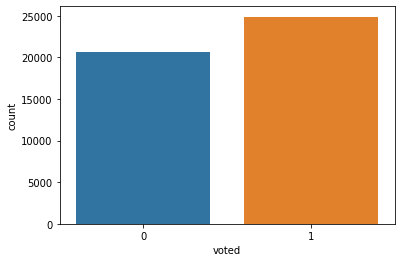

In [38]:
sns.countplot(train_y)

In [48]:
train.columns

Index(['QaE', 'QdA', 'education', 'engnat', 'familysize', 'hand', 'married',
       'voted', 'gender_code', 'age_group_code', 'race_code', 'religion_code'],
      dtype='object')

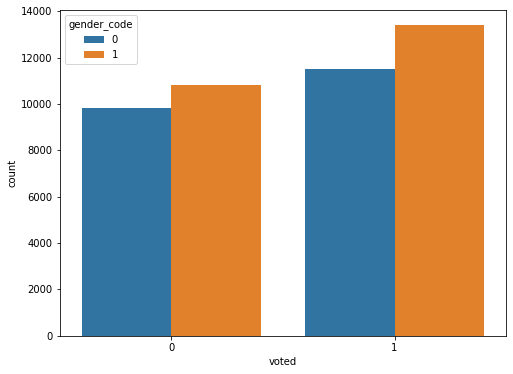

In [52]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'voted', hue = 'gender_code') #hue:기준

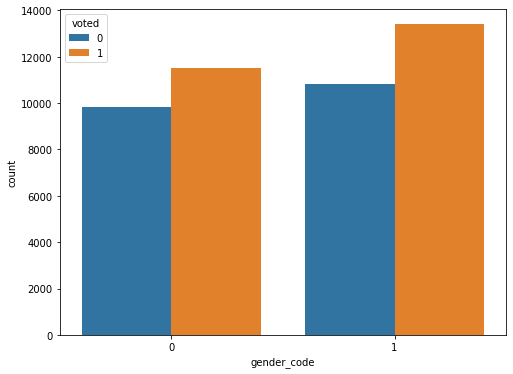

In [50]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender_code', hue = train_y)

<AxesSubplot:xlabel='age_group_code', ylabel='count'>

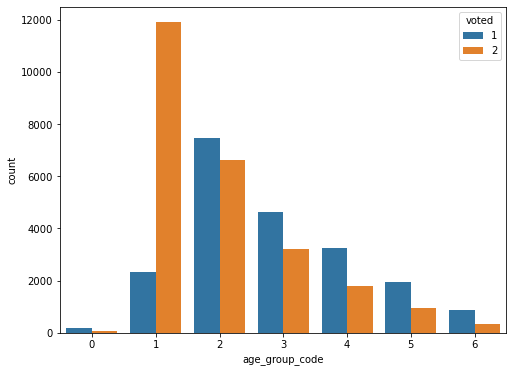

In [250]:
#굉장이 다른 성향을 보이는 age group이 존재
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group_code', hue = train_y)

<AxesSubplot:>

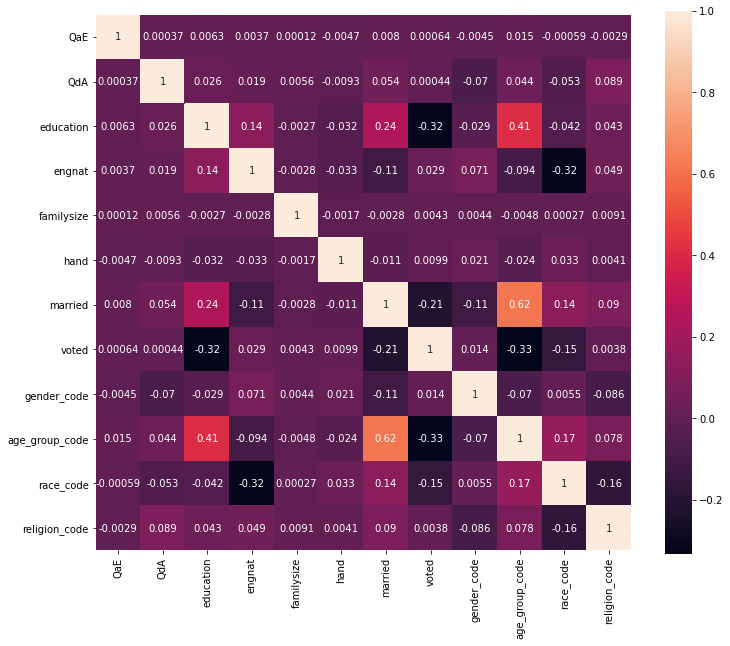

In [251]:
#heatmap
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),square = True, annot = True)

# Question을 이용한 feature 추출 예시

<AxesSubplot:xlabel='QdA', ylabel='count'>

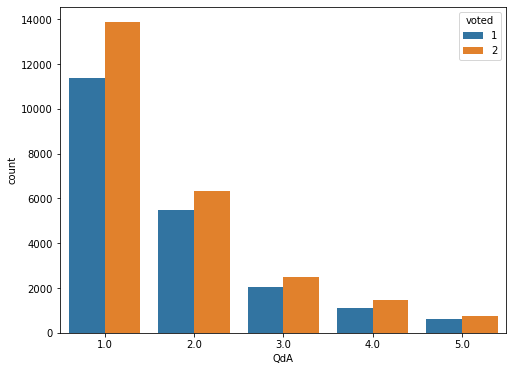

In [252]:
# 가설1: 고민 시간이 긴 질문은 영향을 많이 주는 질문일 것이다.-> Qd
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'QdA', hue = train_y)

In [31]:
import numpy            
from scipy import stats

In [52]:
temp = train[['QdA','QdE','voted']]

In [53]:
temp

,QdA,QdE,voted
index,,,
0,1.0,1024,2
1,5.0,2969,2
2,4.0,3374,1
3,3.0,3245,1
4,2.0,1062,1
...,...,...,...
45527,1.0,285,2
45528,1.0,798,2
45529,4.0,1515,1


In [60]:
temp['std_QdE'] = (temp['QdE'] - temp['QdE'].mean()) / temp['QdE'].std()

<ipython-input-60-103efc51a488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['std_QdE'] = (temp['QdE'] - temp['QdE'].mean()) / temp['QdE'].std()


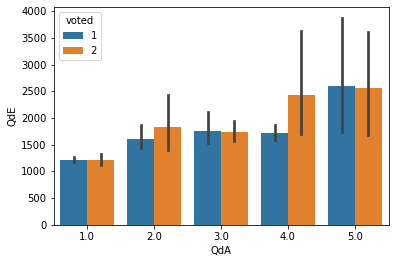

In [63]:
sns.barplot(x = 'QdA',y = 'QdE',data = temp , hue = 'voted')

In [45]:
temp = train[['QdE','voted']]

In [47]:
temp['voted'] = le.fit_transform(temp['voted'])

<ipython-input-47-3eacfd01e40d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['voted'] = le.fit_transform(temp['voted'])


In [48]:
temp

,QdE,voted
index,,
0,1024,1
1,2969,1
2,3374,0
3,3245,0
4,1062,0
...,...,...
45527,285,1
45528,798,1
45529,1515,0


In [43]:
import statsmodels.api as sm

In [50]:
logit = sm.Logit(endog = temp['voted'] , exog = temp['QdE']).fit()

Optimization terminated successfully.
         Current function value: 0.692893
         Iterations 5


In [51]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  voted   No. Observations:                45532
Model:                          Logit   Df Residuals:                    45531
Method:                           MLE   Df Model:                            0
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:               -0.006007
Time:                        14:12:02   Log-Likelihood:                -31549.
converged:                       True   LL-Null:                       -31360.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QdE         8.834e-06   2.48e-06      3.565      0.000    3.98e-06    1.37e-05
==============================================================================
"""

In [253]:
# 가설2: 특정 성향의 사람들은 답변 응답시간이 더 길 것이다.
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

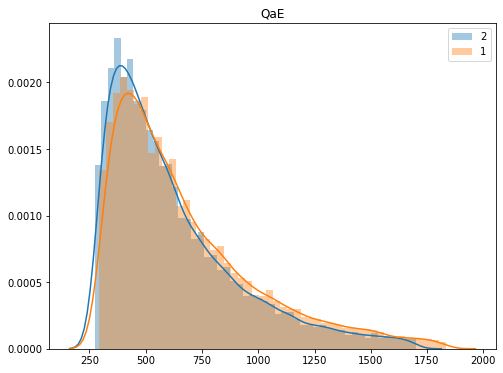

In [254]:
plot_to_voted(train, 'QaE', train_y.unique())

# Modeling

In [255]:
# 변수 제거
drop_last = ['familysize', 'gender_code','hand','education']
new_train= train.drop(drop_last, axis = 1)
new_train = new_train.drop(['voted'], axis = 1)
test = test.drop(drop_last, axis = 1)

In [260]:
new_train.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,363,1.0,1,3,3,6,10
1,647,5.0,2,1,2,1,7
2,1623,4.0,1,2,3,6,10
3,504,3.0,2,1,2,1,7
4,927,2.0,1,2,2,6,0


In [257]:
test.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,736,1.0,2,1,1,6,6
1,514,3.0,2,1,1,5,3
2,500,2.0,2,2,3,5,5
3,669,2.0,1,2,6,6,3
4,499,2.0,1,1,1,6,0


In [261]:
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(new_train, train_y)

LGBMClassifier(n_estimators=500)

In [262]:
pred_y = model.predict(test)

In [263]:
pred_y

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

# submission

In [264]:
submission['voted']=pred_y

In [265]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,2
11379,2
11380,1


In [266]:
submission.to_csv('/sample_submission.csv')